In [11]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Importing data files
malware = pd.read_csv('./FinalDataset/Malware.csv')
# len(malware)

In [13]:
# Data cleaning by dropping all the rows
cleaned = malware.dropna()

In [14]:
# Divison of data by columns
# x1 is for independent columns, whilee y1 is target column which is type of attack.
x1 = cleaned.iloc[:,0:79]
y1 = cleaned.iloc[:,-1]

/Users/yashchoksi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


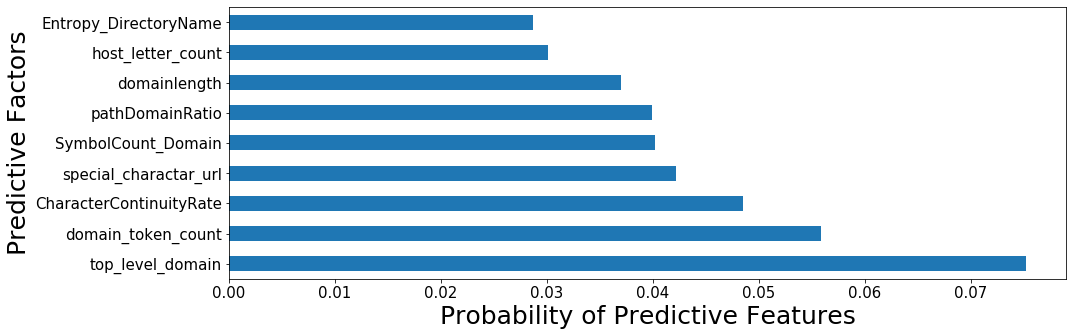

In [16]:
# Feature selection 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x1,y1)
# Extract best 10 features from all 79 features
fig, ax = plt.subplots(figsize=(15, 5))
feature_imp= pd.Series(model.feature_importances_,index=x1.columns)
feature_imp.nlargest(9).plot(kind='barh')
plt.xlabel("Probability of Predictive Features", fontsize=25)
plt.ylabel("Predictive Factors", fontsize= 25)
# plt.title("Feature selection for malware", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
# As everytime features are changing on every run 
# Stroring feeatures in ts variable.
ts = (feature_imp.nlargest(10).to_dict())
ts = ts.keys()

In [18]:
# Final columns for training and testing for model
columns_to_keep = x1[ts]
from sklearn.model_selection import train_test_split
# TODO: What is random state and how it's value is chosen?
features_train,features_test,y_train,y_test = train_test_split(columns_to_keep,y1,test_size=0.3,random_state=66)
from sklearn.ensemble import RandomForestClassifier
# Intiate the model
rfc = RandomForestClassifier()
rfc.fit(features_train,y_train)
score = rfc.score(features_test, y_test)
score

/Users/yashchoksi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9878787878787879

In [19]:
score

0.9878787878787879

In [10]:
predicted_data = rfc.predict(features_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [12]:
confusion_matrix(y_test, predicted_data)

array([[ 829,    5],
       [  12, 1299]])

In [34]:
# Supply actual data and predcited data.
def confusion(actual, predicted):
    print("Confusion matrix: \n", confusion_matrix(actual, predicted))
    print("Precision Score: ", precision_score(actual, predicted, pos_label='malware'))
    print("Recall score: ", recall_score(actual, predicted, pos_label='malware'))
    print("Accuracy of our prediction: ", accuracy_score(actual, predicted))

In [35]:
confusion(y_test, predicted_data)

Confusion matrix: 
 [[ 829    5]
 [  12 1299]]
Precision Score:  0.9961656441717791
Recall score:  0.9908466819221968
Accuracy of our prediction:  0.992074592074592
